## <div style="text-align: center; color: green;">Project Title: Concrete Strength Prediction</div>

### <div style="color: gray;">Step 1: Dataset Overview-</div>
- Download the dataset.
- Specify the target variable: strength (compressive strength of the concrete).

### <div style="color: gray;">Step 1: Solution-</div>
#### Import necessary libraries:

In [1]:
# Import the numerical algebra libs
import pandas as pd
import numpy as np

# Import visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

# Import score libs
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset:

In [2]:
data = pd.read_csv('concrete.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Dataset description:
##### Cement (cement) -- `quantitative -- kg in a m3 mixture --` Input Variable
##### Blast Furnace Slag (slag) -- `quantitative -- kg in a m3 mixture --` Input Variable
##### Fly Ash (ash) -- `quantitative -- kg in a m3 mixture --` Input Variable
##### Water (water) -- `quantitative -- kg in a m3 mixture --` Input Variable
##### Superplasticizer (superplastic) -- `quantitative -- kg in a m3 mixture --` Input Variable
##### Coarse Aggregate (coarseagg) -- `quantitative -- kg in a m3 mixture --` Input Variable
##### Fine Aggregate (fineagg) -- `quantitative -- kg in a m3 mixture -- `Input Variable
##### Age(age) -- `quantitative -- Day (1~365) --` Input Variable
##### Concrete compressive strength(strength) --` quantitative -- MPa -- `Output Variable

In [3]:
#Rename Column name
data.rename(columns=dict(zip(data.columns, ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'])), inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### <div style="color: gray;">Step 2: Data Preprocessing-</div>

- Handle missing values, outliers, and any data anomalies.
- Explore the distribution of the target variable and features.
- Standardize or normalize numerical features if necessary.


### <div style="color: gray;">Step 2: Solution-</div>

#### Handle missing values, outliers and any data anomalies:

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

##### Observations:
- All of the data in the dataset is numerical
- No null/NAN data
- Age data appears to have outliers because max value is very large as compared to 3rd IQR value

#### Data Analysis:

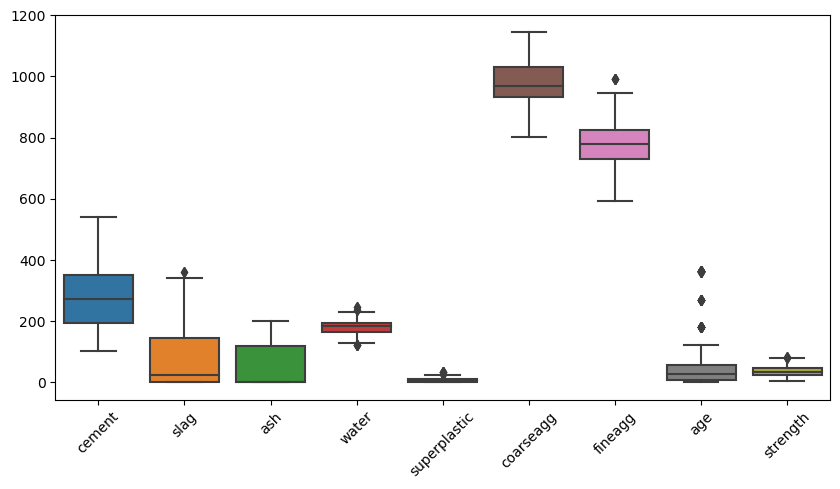

In [7]:
#Box Plot
plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

##### Observations
- Age column appears to be having maximum number of outliers
- Slag, Water, superplastic, fineagg features have some outliers
- All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale the data so as to avoid bias in algorithms

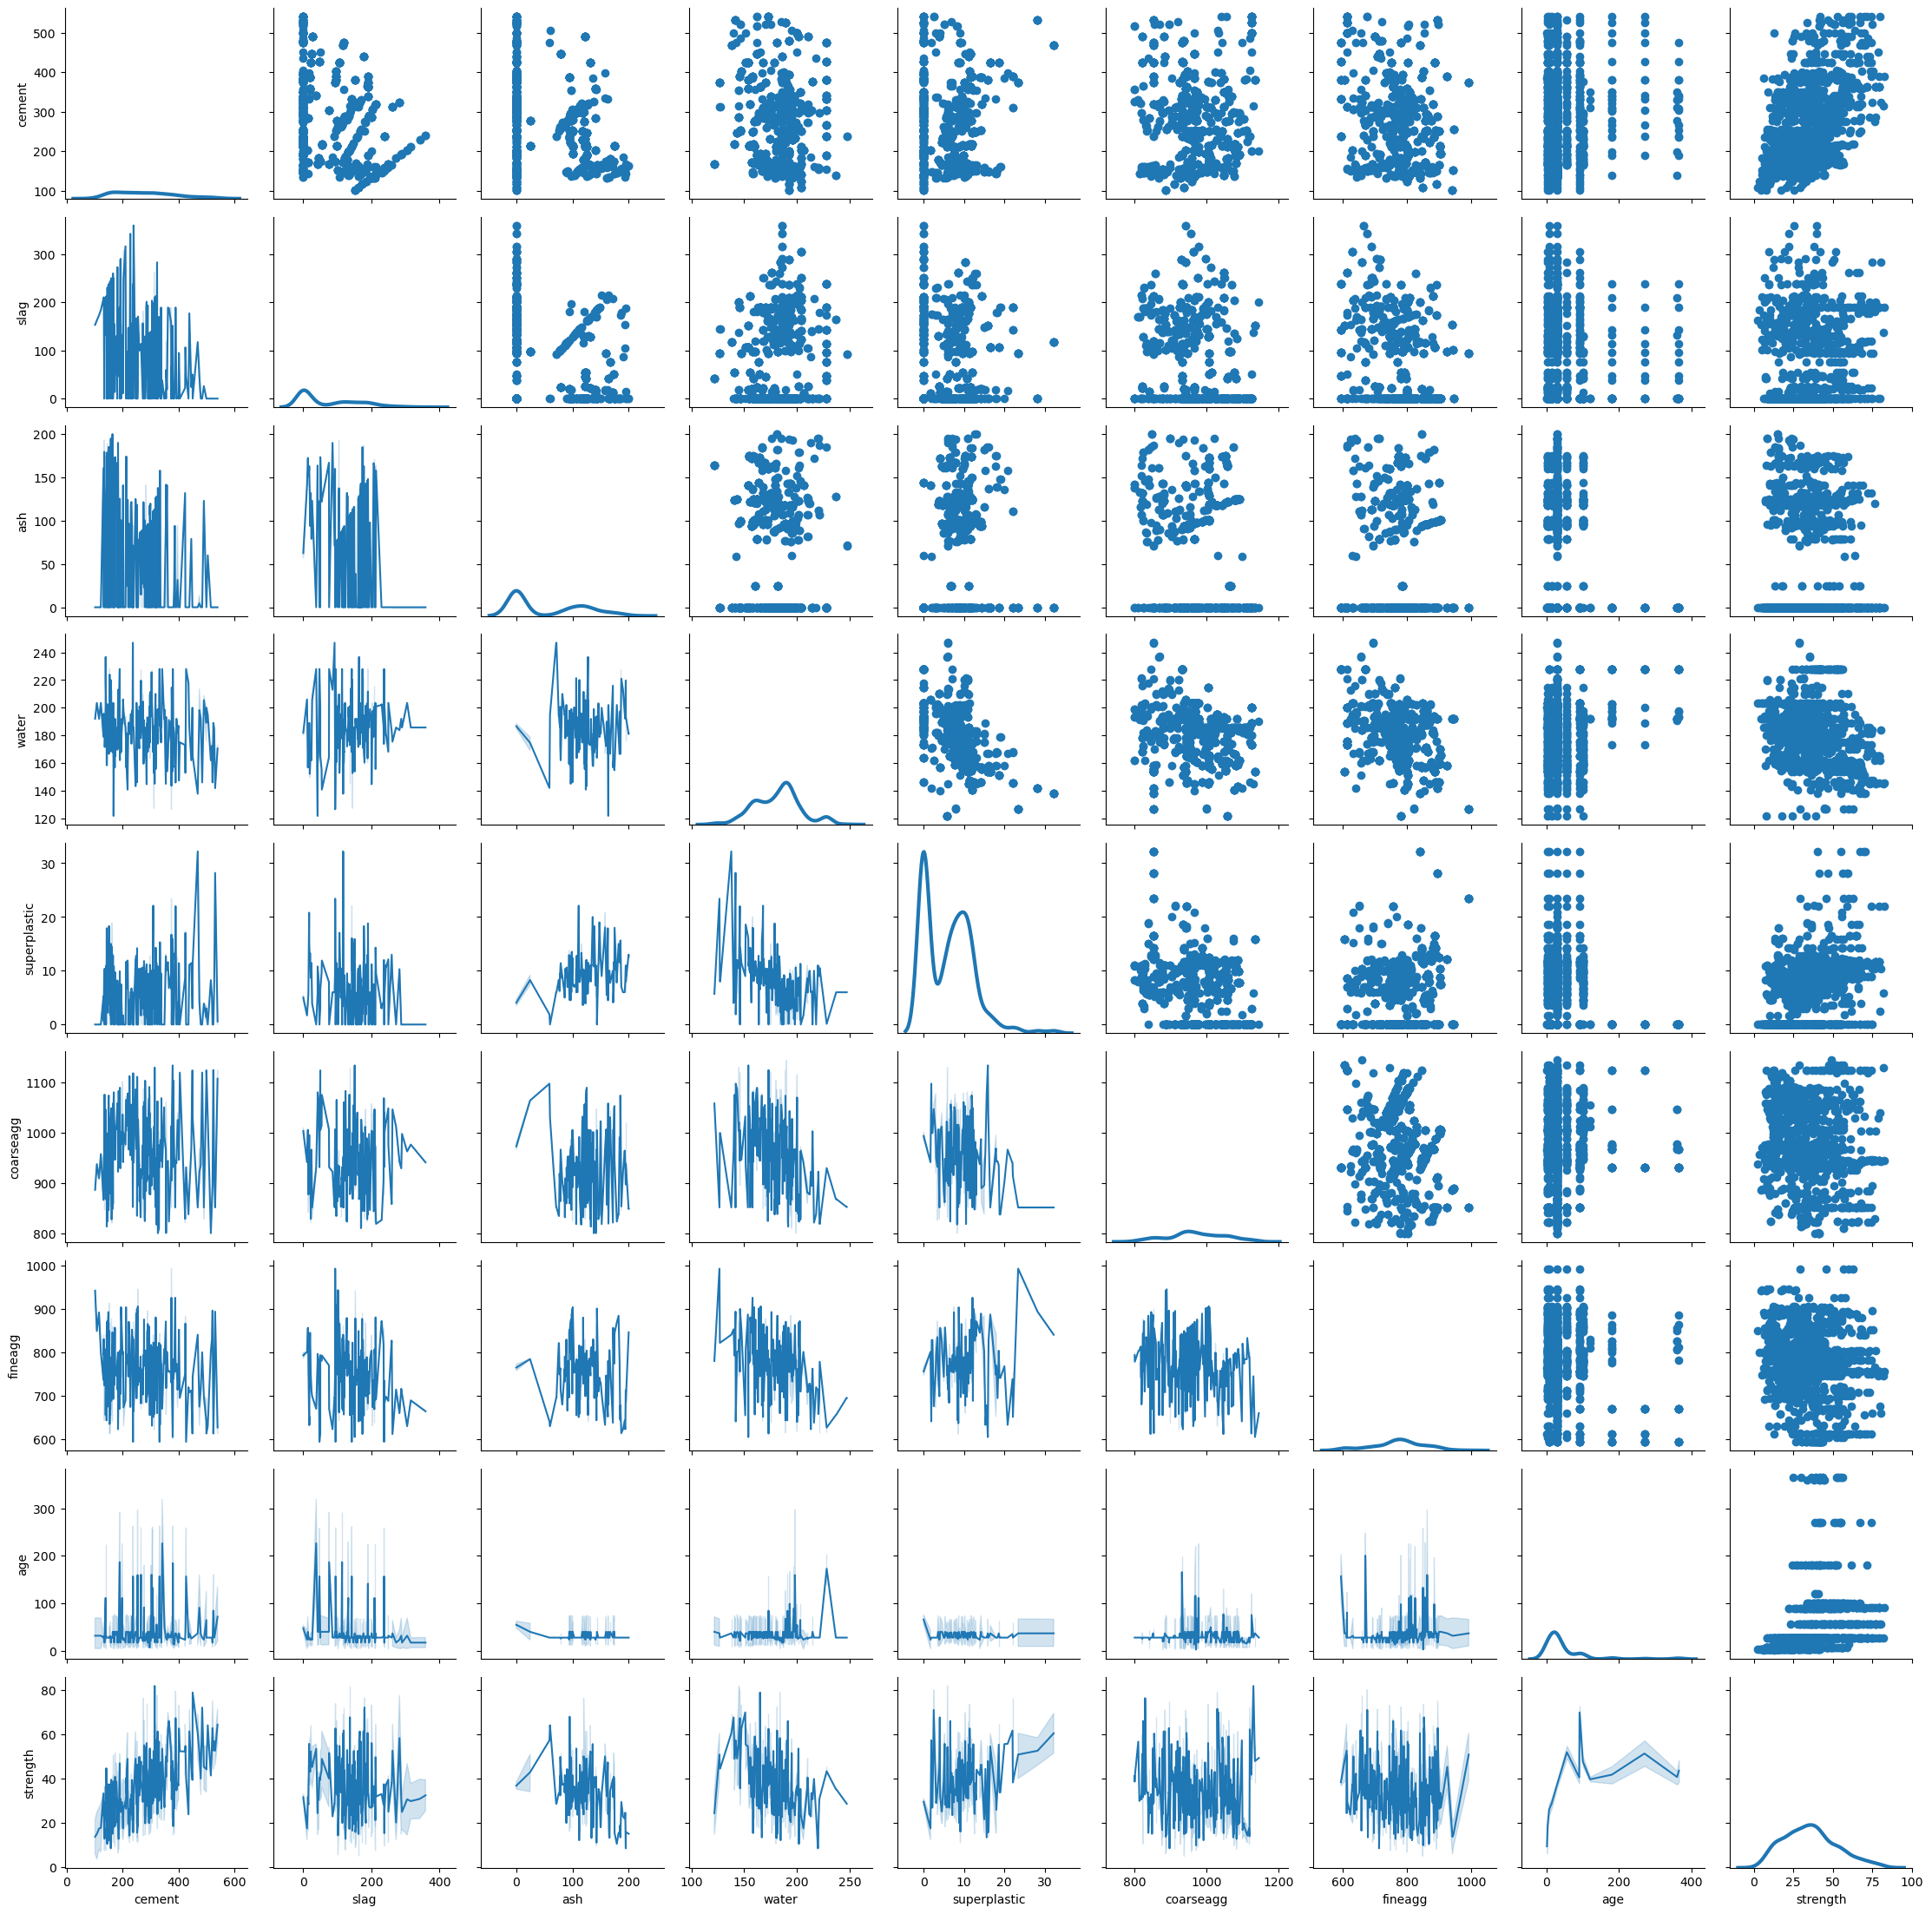

In [8]:
#Pair plot
g = sns.PairGrid(data)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, lw=3, legend=True);

##### Observations

`Diagonal analysis & dist plots analysis:`
- Distribution of cement appears nearly normal
- Slag and ash has 2 gaussians and is skewed
- Water and Superplastic have near normal distributions
- Age data has long tail which confirms the presence of outliers
- Strength is normally distributed

`Off-diagonal analysis with strength:`
- Cement has strong correlation with strength
- Slag is a very weak predictor because the distribution is like a cloud
- ash, coarseagg and fineagg are also weak predictors
- Water appears to have a negative correlation with strength
- Superplastic appears to have positive correlation with strength
- age also has strong correlation with strength

`Off-diagonal analysis between other features:`
- Cement and slag have strong correlation
- Water and super plastic have strong negative correlation

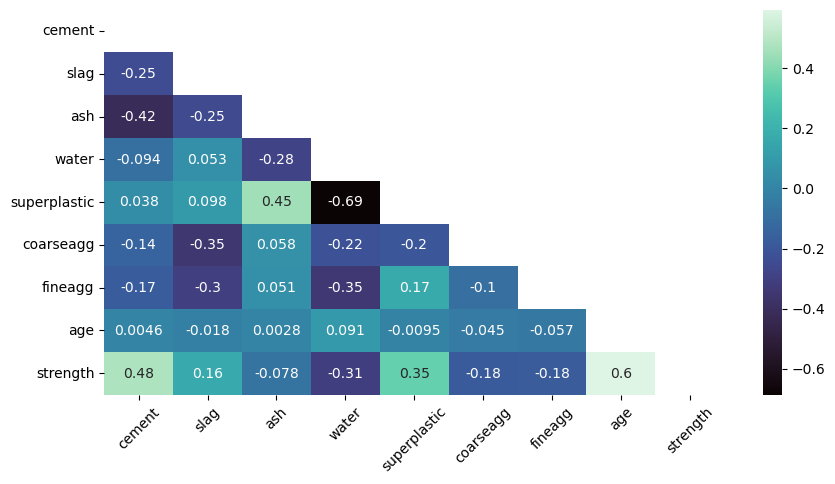

In [9]:
#Heat map
plt.subplots(figsize=(10, 5))
corr = data.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

##### Observations
- As expected, cement and age have strong correlation with strength
- Super plastic has mild positive correlation with strength
- As expected, water and superplastic have strong negative correlation

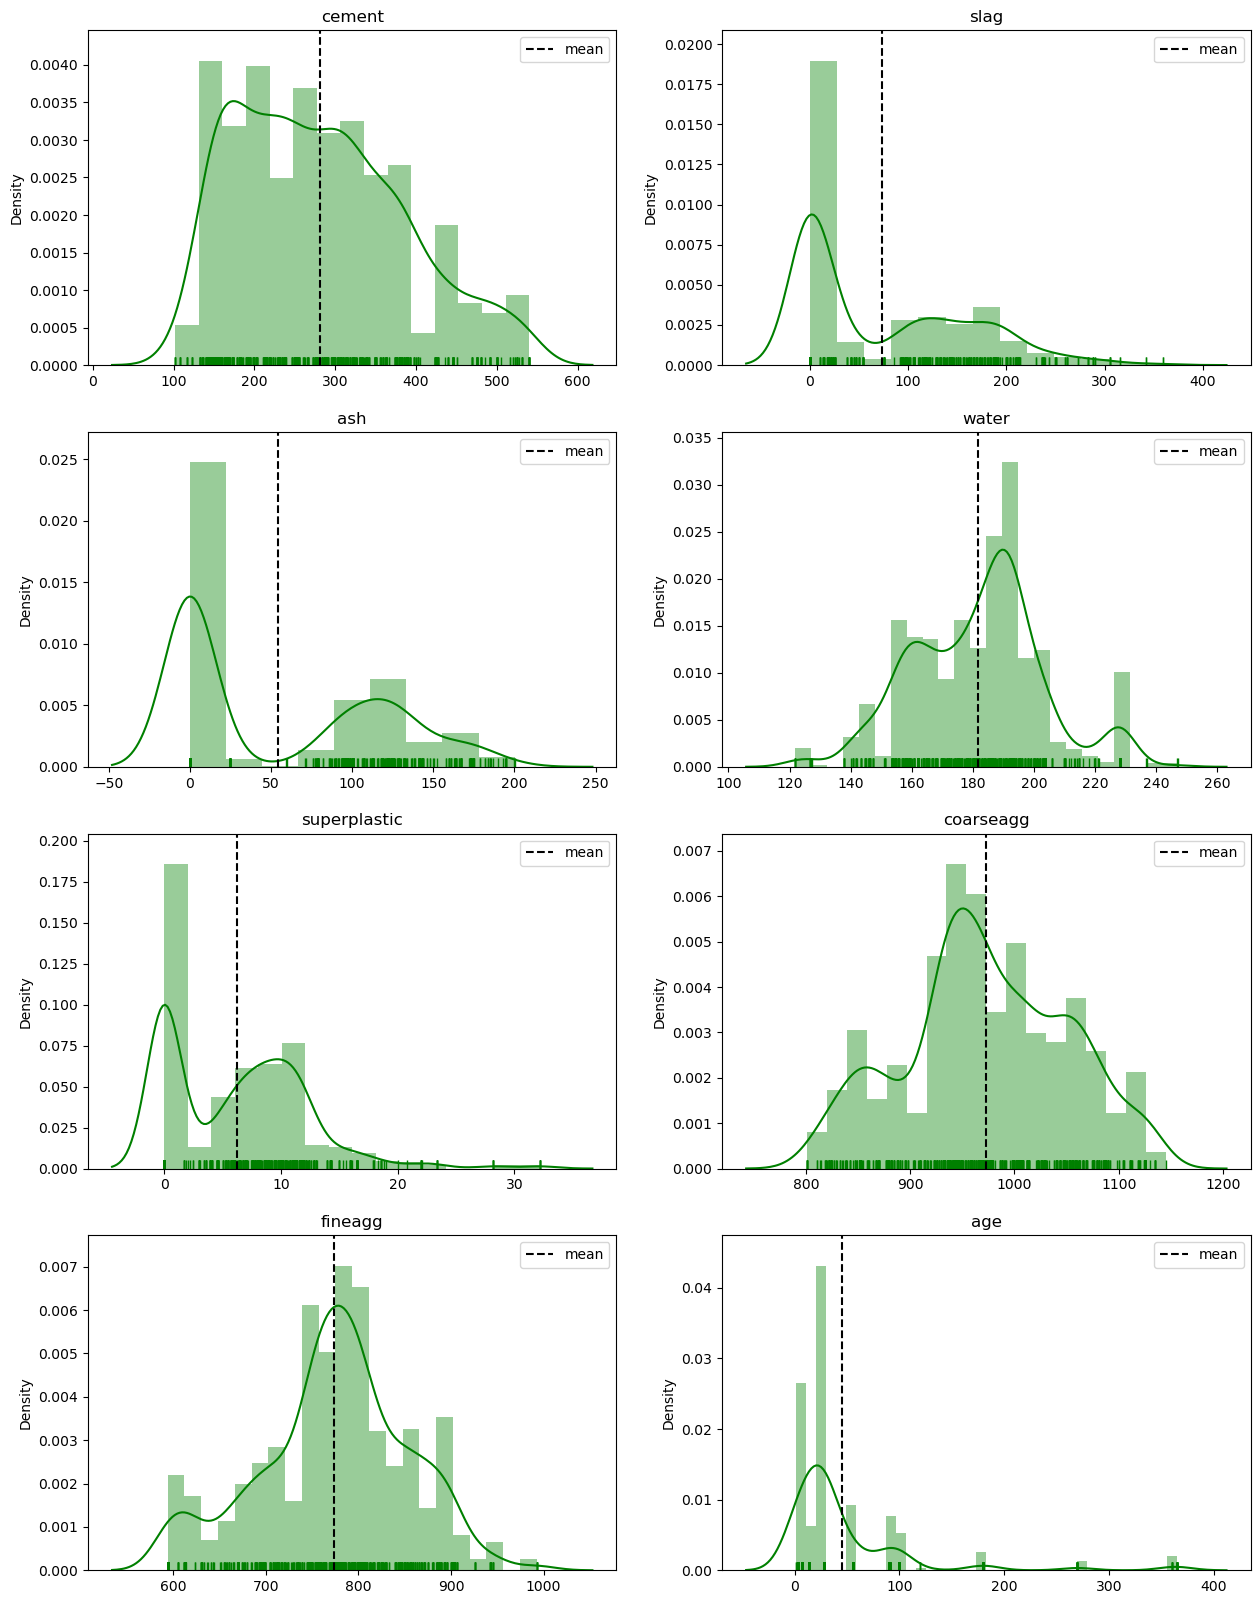

In [10]:
#Distribution of independent variables

import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

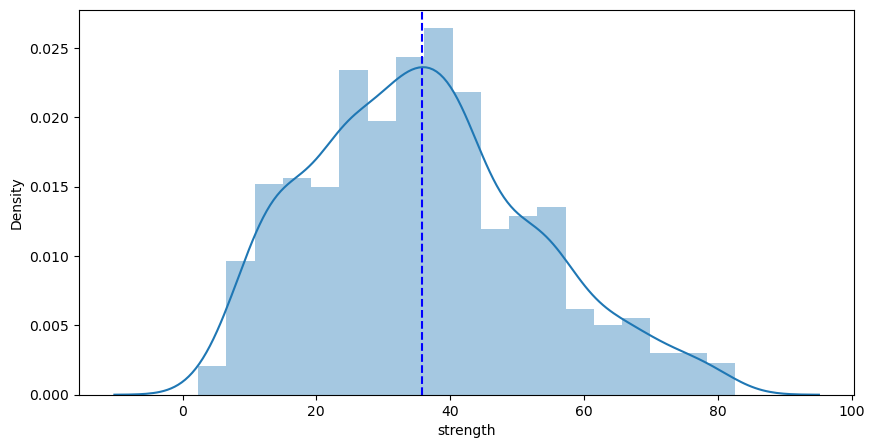

In [11]:
#Distribution of dependent variable

fig = plt.figure(figsize=(10, 5))
plt.axvline(data.strength.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(data.strength);

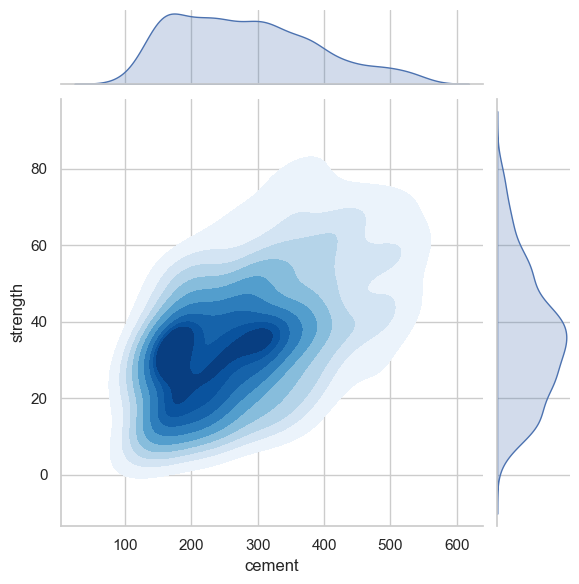

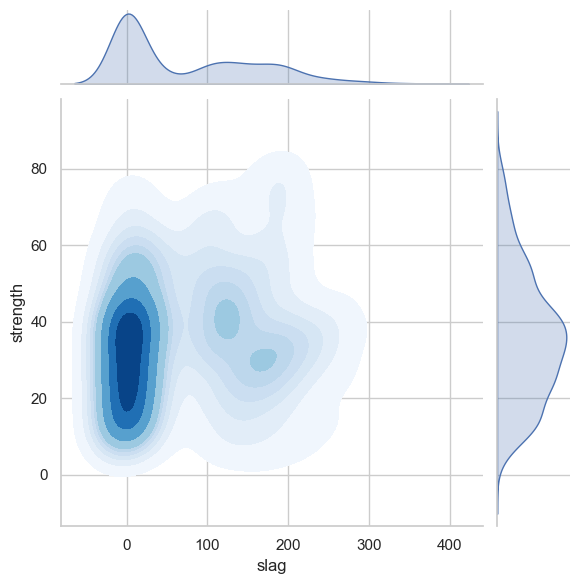

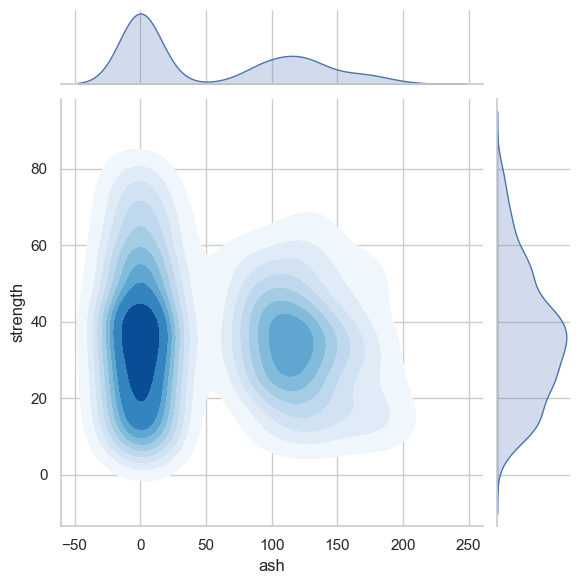

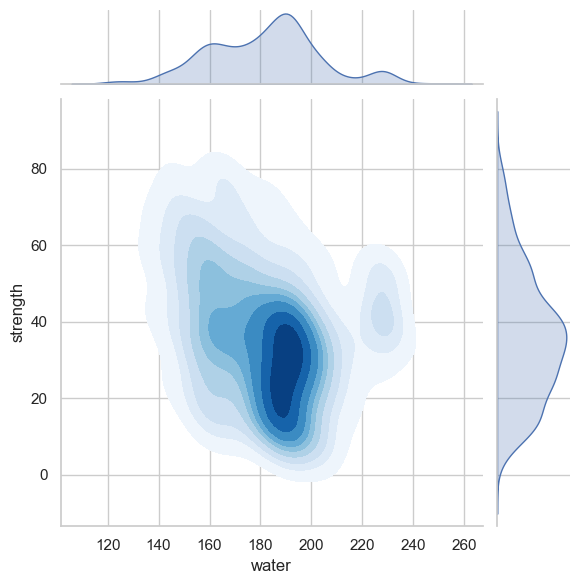

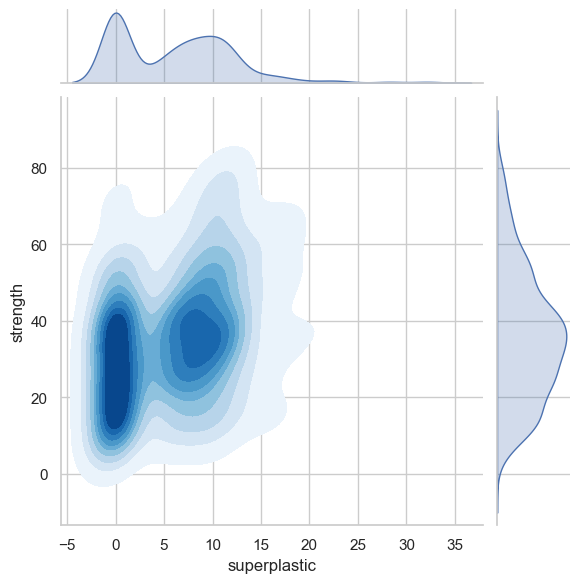

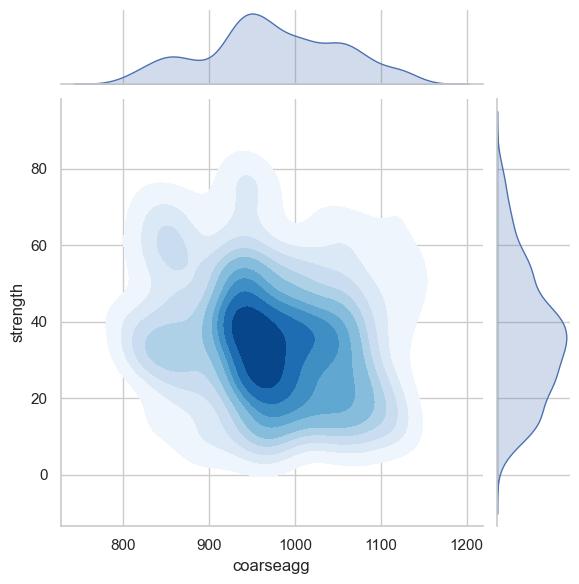

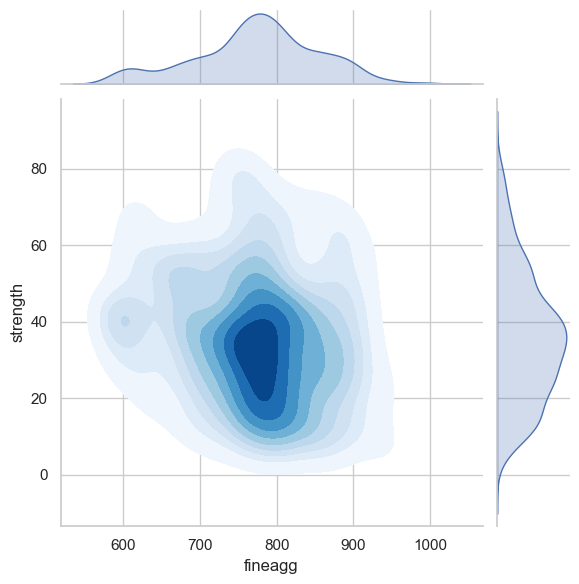

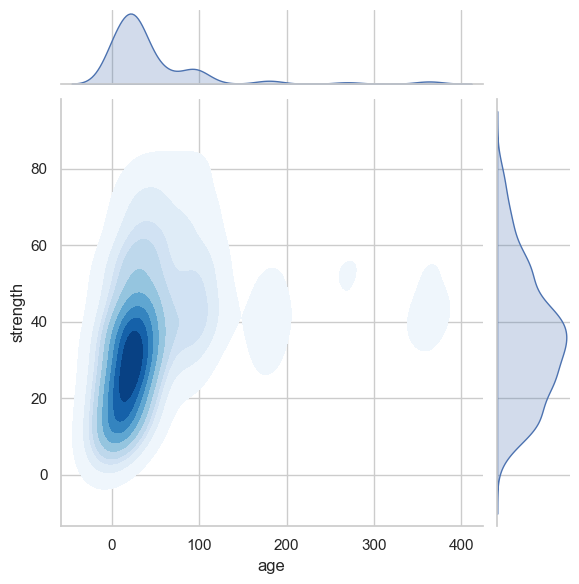

In [12]:
#Relationship Between Each Variable and Target Variable (strength)

sns.set(style="whitegrid")

cols_without_y = data.drop("strength", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=data[col], y=data["strength"], kind="kde", cmap="Blues", fill=True)
    plt.show()

##### Observations
From the above analysis, I see it-

- Water, superplastic, age and cement are the most important attributes for strength prediction
- ash, coarseagg and fineagg are not strong predictors for strength prediction
- slag is mildly important predictor

#### Cleaning the data

In [13]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(14,14))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    print()
    plt.show()
    return df

<Figure size 1400x1400 with 0 Axes>

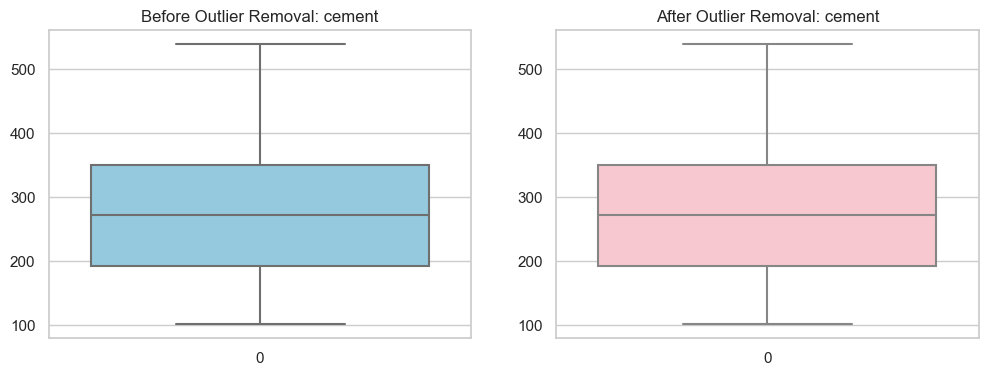

<Figure size 1400x1400 with 0 Axes>

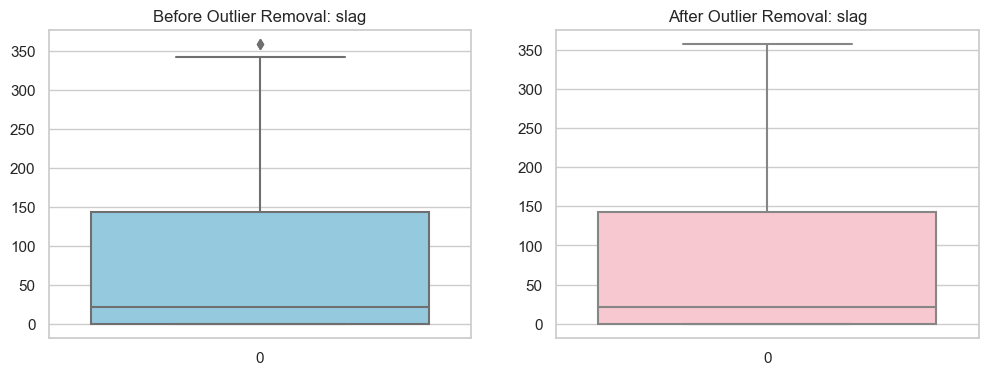

<Figure size 1400x1400 with 0 Axes>

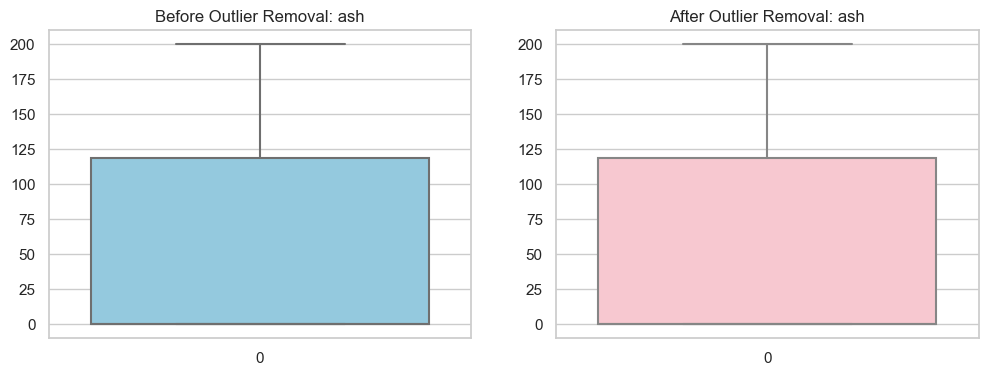

<Figure size 1400x1400 with 0 Axes>

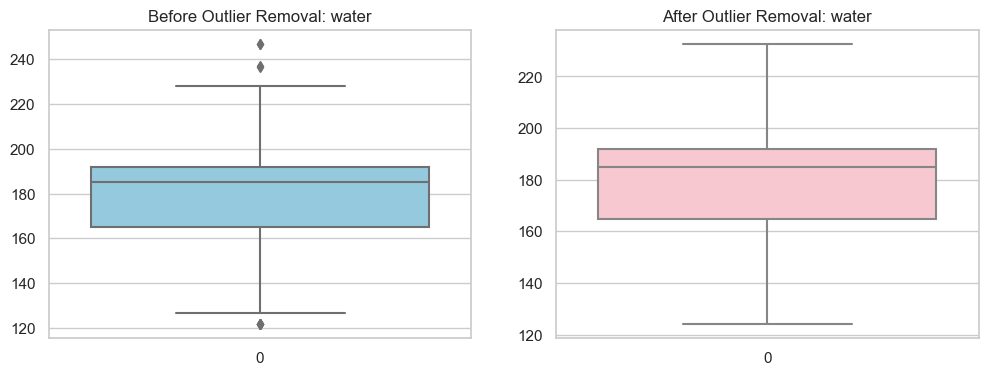

<Figure size 1400x1400 with 0 Axes>

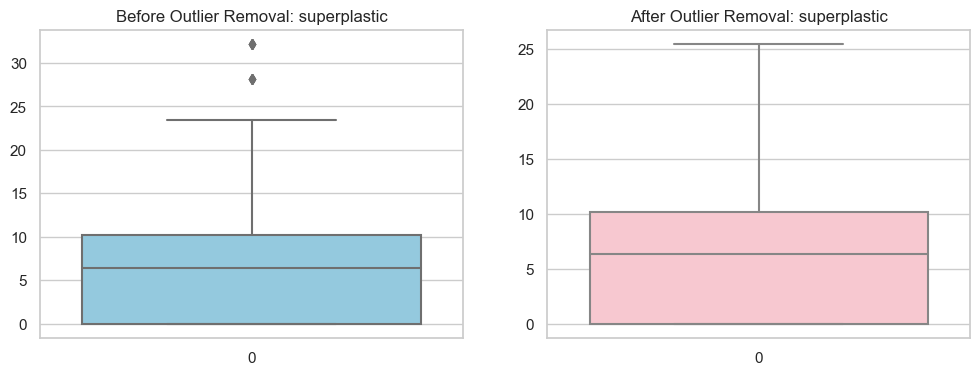

<Figure size 1400x1400 with 0 Axes>

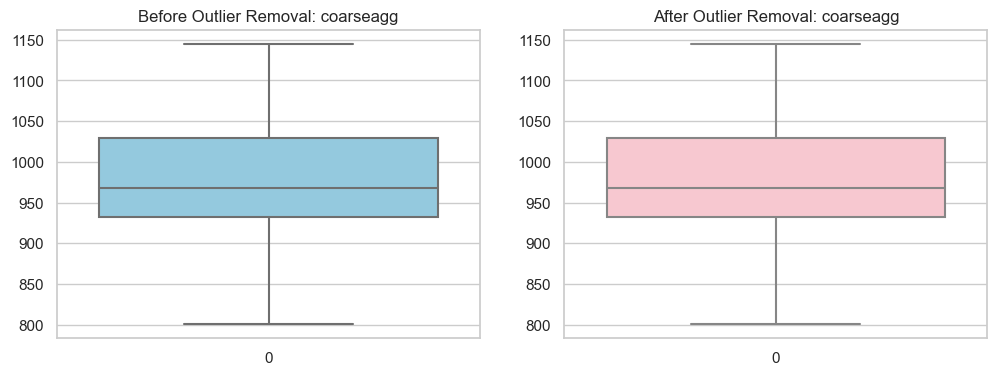

<Figure size 1400x1400 with 0 Axes>

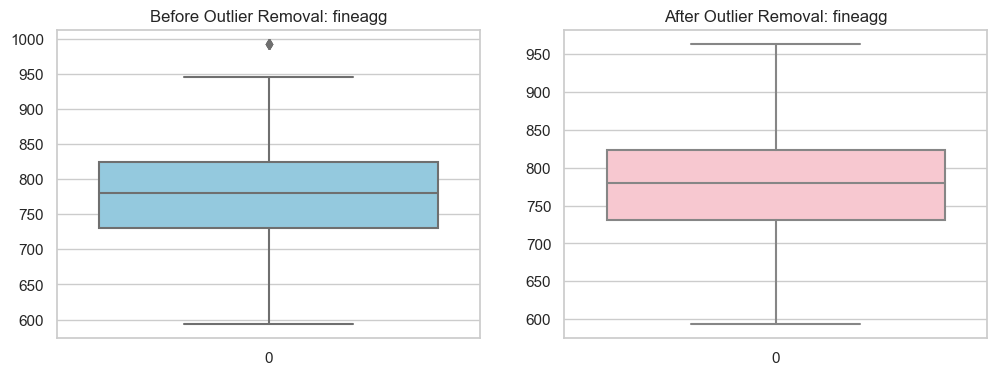

<Figure size 1400x1400 with 0 Axes>

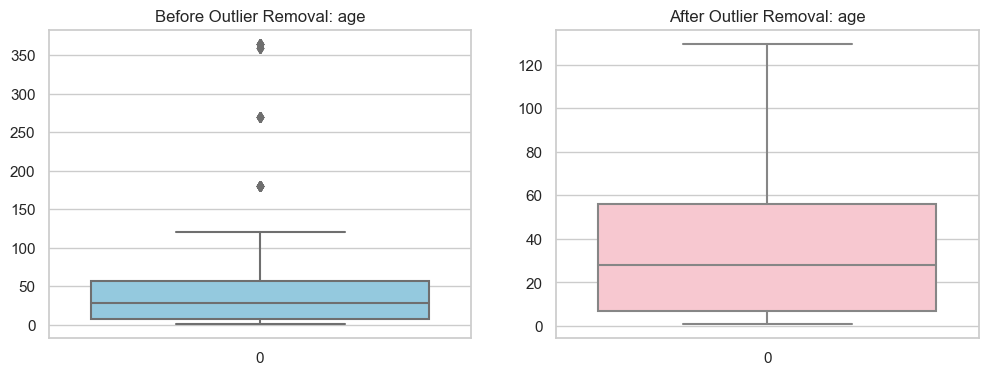

In [14]:
for col in data.select_dtypes(exclude="object").columns[:-1]:
    data = remove_outlier(data,col)

### <div style="color: gray;">Step 3. Model Selection-</div>

Choose at least three regression models for concrete strength prediction. Suggested models include:

   - Linear Regression
   - Random Forest Regressor
   - Gradient Boosting Regressor (e.g., XGBoost)

### <div style="color: gray;">Step 3: Solution-</div>

 #### Defining the Target and Predictors Variables

In [15]:
X = data.drop("strength", axis = 1).values
Y = data["strength"]

#### Splitting the dataset into train and test

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 4, test_size = 0.2)

In [17]:
x_train.shape, y_train.shape

((824, 8), (824,))

In [18]:
x_test.shape, y_test.shape

((206, 8), (206,))

#### Normalizing the data

In [19]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

#### Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

LR= LinearRegression().fit(x_train, y_train)

#### Evaluate Linear Regression Model

Mean Absolute Error (MAE) : 7.542729076878017
Mean Squared Error (MSE) : 92.37644594548381
Root Mean Squared Error (RMSE) : 9.611266615045272
R-squared (R2) score : 0.6946937864285301


<Axes: xlabel='strength'>

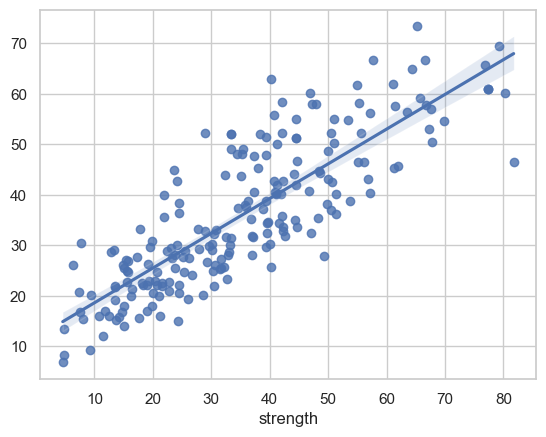

In [21]:
y_pred = LR.predict(x_test)
    
MAE_LR= mean_absolute_error(y_test, y_pred)
MSE_LR= mean_squared_error(y_test, y_pred)
RMSE_LR= mean_squared_error(y_test, y_pred)**0.5
R2_LR= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_LR)
print("Mean Squared Error (MSE) :", MSE_LR)
print("Root Mean Squared Error (RMSE) :", RMSE_LR)
print("R-squared (R2) score :", R2_LR)
         
sns.regplot(x=y_test,y=y_pred)

#### Linear Regression with Polynomial Features degree 2 Model

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_deg_2_trainpoly = poly.fit_transform(x_train)
x_deg_2_testpoly = poly.fit_transform(x_test)

LR_deg_2= LinearRegression().fit(x_deg_2_trainpoly, y_train)

#### Evaluate Linear Regression with Polynomial Features degree 2 Model

Mean Absolute Error (MAE) : 5.291569838424118
Mean Squared Error (MSE) : 50.126517579241494
Root Mean Squared Error (RMSE) : 7.08000830361388
R-squared (R2) score : 0.8343307417274572


<Axes: xlabel='strength'>

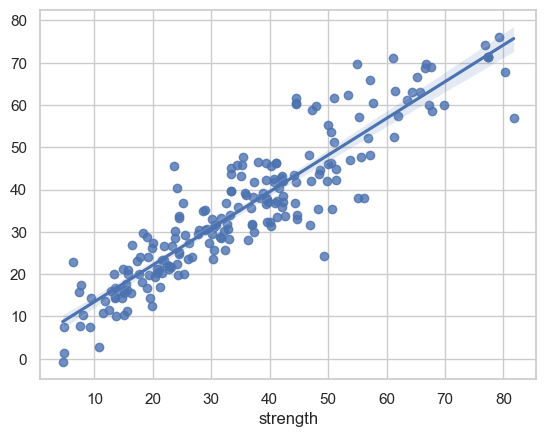

In [23]:
y_pred = LR_deg_2.predict(x_deg_2_testpoly)
    
MAE_LR_deg_2= mean_absolute_error(y_test, y_pred)
MSE_LR_deg_2= mean_squared_error(y_test, y_pred)
RMSE_LR_deg_2= mean_squared_error(y_test, y_pred)**0.5
R2_LR_deg_2= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_LR_deg_2)
print("Mean Squared Error (MSE) :", MSE_LR_deg_2)
print("Root Mean Squared Error (RMSE) :", RMSE_LR_deg_2)
print("R-squared (R2) score :", R2_LR_deg_2)
         
sns.regplot(x=y_test,y=y_pred)

#### Linear Regression with Polynomial Features degree 3 Model

In [24]:
poly = PolynomialFeatures(degree=3)

x_deg_3_trainpoly = poly.fit_transform(x_train)
x_deg_3_testpoly = poly.fit_transform(x_test)

LR_deg_3= LinearRegression().fit(x_deg_3_trainpoly, y_train)

#### Evaluate Linear Regression with Polynomial Features degree 3 Model

Mean Absolute Error (MAE) : 4.979939470160179
Mean Squared Error (MSE) : 48.284970692188224
Root Mean Squared Error (RMSE) : 6.948738784282241
R-squared (R2) score : 0.8404170952502196


<Axes: xlabel='strength'>

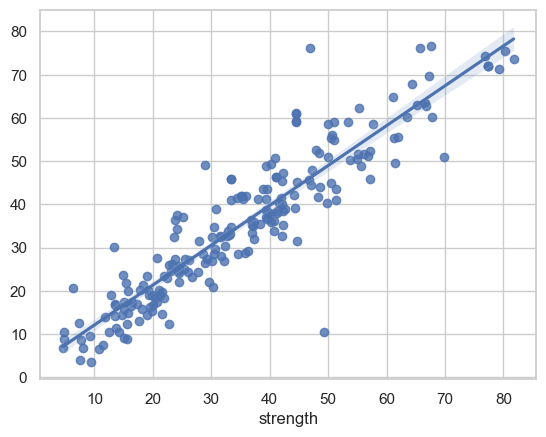

In [25]:
y_pred = LR_deg_3.predict(x_deg_3_testpoly)
    
MAE_LR_deg_3= mean_absolute_error(y_test, y_pred)
MSE_LR_deg_3= mean_squared_error(y_test, y_pred)
RMSE_LR_deg_3= mean_squared_error(y_test, y_pred)**0.5
R2_LR_deg_3= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_LR_deg_3)
print("Mean Squared Error (MSE) :", MSE_LR_deg_3)
print("Root Mean Squared Error (RMSE) :", RMSE_LR_deg_3)
print("R-squared (R2) score :", R2_LR_deg_3)
         
sns.regplot(x=y_test,y=y_pred)

#### Support Vector Machine(SVM) Model

In [26]:
from sklearn.svm import SVR

SVR= SVR().fit(x_train, y_train)

#### Evaluate Support Vector Machine(SVM) Model

Mean Absolute Error (MAE) : 7.542721459958756
Mean Squared Error (MSE) : 93.78661580928905
Root Mean Squared Error (RMSE) : 9.68434901319077
R-squared (R2) score : 0.690033143586035


<Axes: xlabel='strength'>

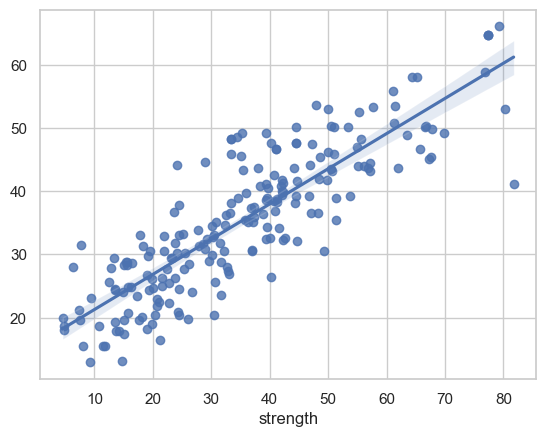

In [27]:
y_pred = SVR.predict(x_test)
    
MAE_SVR= mean_absolute_error(y_test, y_pred)
MSE_SVR= mean_squared_error(y_test, y_pred)
RMSE_SVR= mean_squared_error(y_test, y_pred)**0.5
R2_SVR= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_SVR)
print("Mean Squared Error (MSE) :", MSE_SVR)
print("Root Mean Squared Error (RMSE) :", RMSE_SVR)
print("R-squared (R2) score :", R2_SVR)
         
sns.regplot(x=y_test,y=y_pred)

#### XGBoost Regressor Model

In [28]:
from xgboost import XGBRegressor

XGB =XGBRegressor().fit(x_train, y_train)

#### Evaluate XGBoost Regressor Model

Mean Absolute Error (MAE) : 3.878177520603809
Mean Squared Error (MSE) : 32.048142405192785
Root Mean Squared Error (RMSE) : 5.661107877897469
R-squared (R2) score : 0.8940801747720083


<Axes: xlabel='strength'>

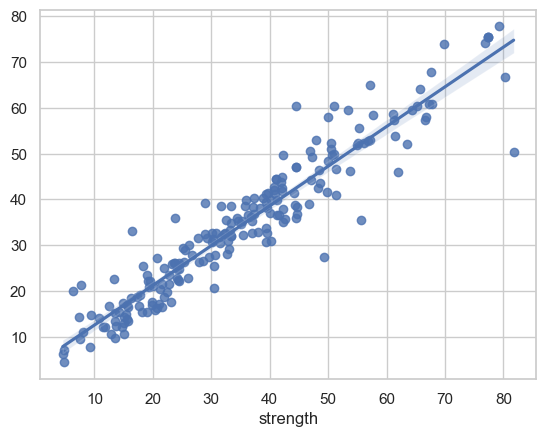

In [29]:
y_pred = XGB.predict(x_test)
    
MAE_XGB= mean_absolute_error(y_test, y_pred)
MSE_XGB= mean_squared_error(y_test, y_pred)
RMSE_XGB= mean_squared_error(y_test, y_pred)**0.5
R2_XGB= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_XGB)
print("Mean Squared Error (MSE) :", MSE_XGB)
print("Root Mean Squared Error (RMSE) :", RMSE_XGB)
print("R-squared (R2) score :", R2_XGB)
         
sns.regplot(x=y_test,y=y_pred)

#### Random Forest Regressor Model

In [30]:
from sklearn.ensemble import RandomForestRegressor

RF= RandomForestRegressor().fit(x_train, y_train)

#### Evaluate Random Forest Regressor Model

Mean Absolute Error (MAE) : 4.6192865360610265
Mean Squared Error (MSE) : 39.19563122861603
Root Mean Squared Error (RMSE) : 6.260641439071242
R-squared (R2) score : 0.8704575648427243


<Axes: xlabel='strength'>

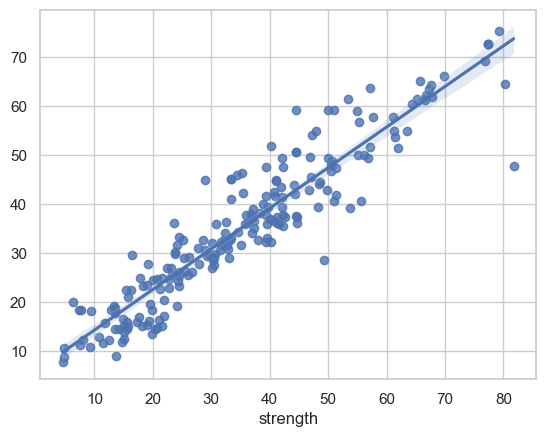

In [31]:
y_pred = RF.predict(x_test)
    
MAE_RF= mean_absolute_error(y_test, y_pred)
MSE_RF= mean_squared_error(y_test, y_pred)
RMSE_RF= mean_squared_error(y_test, y_pred)**0.5
R2_RF= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_RF)
print("Mean Squared Error (MSE) :", MSE_RF)
print("Root Mean Squared Error (RMSE) :", RMSE_RF)
print("R-squared (R2) score :", R2_RF)
         
sns.regplot(x=y_test,y=y_pred)

### <div style="color: gray;">Step 4.  Model Training-</div>

- Split the dataset into training and testing sets.
- Train each selected model on the training dataset.


In [32]:
#I already done this part in Step 3

### <div style="color: gray;">Step 5.  Evaluation Metrics-</div>

Evaluate the performance of each model on the testing set using regression metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2) score

In [33]:
#I already done this part in Step 3

### <div style="color: gray;">Step 6.  Feature Importance-</div>

- If applicable (e.g., for Random Forest or Gradient Boosting models), analyze and interpret feature importance for insights into what influences concrete strength the most. 

### <div style="color: gray;">Step 6: Solution-</div>

From Data analysis observation, I see it-
- Water, superplastic, age and cement are the most important attributes for strength prediction
- ash, coarseagg and fineagg are not strong predictors for strength prediction
- slag is mildly important predictor


Now, for this part I drop the less important features from the dataset and predict data into Random Forest or Gradient Boosting models

In [34]:
#copy main data to another dataframe
data_1= data
data_1.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [35]:
#drop less important features
data_1=data_1.drop(['ash', 'coarseagg', 'fineagg'], axis=1)
data_1.head()

,cement,slag,water,superplastic,age,strength
0,540.0,0.0,162.0,2.5,28.0,79.99
1,540.0,0.0,162.0,2.5,28.0,61.89
2,332.5,142.5,228.0,0.0,129.5,40.27
3,332.5,142.5,228.0,0.0,129.5,41.05
4,198.6,132.4,192.0,0.0,129.5,44.30


#### Defining the Target and Predictors Variables

In [36]:
X_FI = data_1.drop("strength", axis = 1).values
Y_FI = data_1["strength"]

#### Splitting the dataset into train and test

In [37]:
xFI_train, xFI_test, yFI_train, yFI_test = train_test_split(X_FI, Y_FI, random_state = 4, test_size = 0.2)

In [38]:
xFI_train.shape, yFI_train.shape

((824, 5), (824,))

In [39]:
xFI_test.shape, yFI_test.shape

((206, 5), (206,))

#### Normalizing the data

In [40]:
s = StandardScaler()
xFI_train = s.fit_transform(xFI_train)
xFI_test = s.fit_transform(xFI_test)

#### XGBoost Regressor Model with feature Importance

In [41]:
XGB_FI =XGBRegressor().fit(xFI_train, yFI_train)

#### Evaluate XGBoost Regressor Model with feature Importance

Mean Absolute Error (MAE) : 4.294526341771617
Mean Squared Error (MSE) : 37.627908169136994
Root Mean Squared Error (RMSE) : 6.134159124862754
R-squared (R2) score : 0.875638924509892


<Axes: xlabel='strength'>

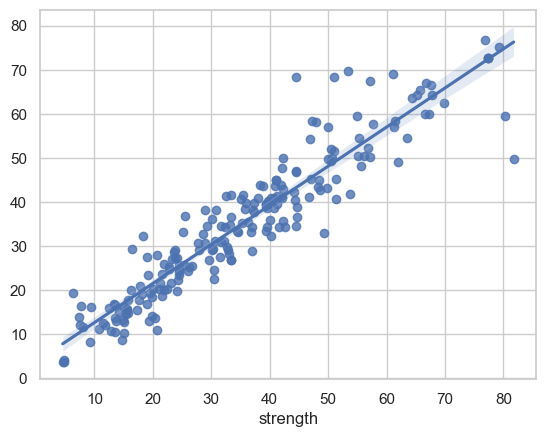

In [42]:
yFI_pred = XGB_FI.predict(xFI_test)
    
MAE_XGB_FI= mean_absolute_error(yFI_test, yFI_pred)
MSE_XGB_FI= mean_squared_error(yFI_test, yFI_pred)
RMSE_XGB_FI= mean_squared_error(yFI_test, yFI_pred)**0.5
R2_XGB_FI= r2_score(yFI_test, yFI_pred)
    
print("Mean Absolute Error (MAE) :",MAE_XGB_FI)
print("Mean Squared Error (MSE) :", MSE_XGB_FI)
print("Root Mean Squared Error (RMSE) :", RMSE_XGB_FI)
print("R-squared (R2) score :", R2_XGB_FI)
         
sns.regplot(x=yFI_test,y=yFI_pred)

#### Random Forest Regressor Model with feature Importance

In [43]:
RF_FI= RandomForestRegressor().fit(xFI_train, yFI_train)

#### Evaluate Random Forest Regressor Model with feature Importance

Mean Absolute Error (MAE) : 5.105296187008784
Mean Squared Error (MSE) : 45.629615116186564
Root Mean Squared Error (RMSE) : 6.754969660641457
R-squared (R2) score : 0.8491931046354843


<Axes: xlabel='strength'>

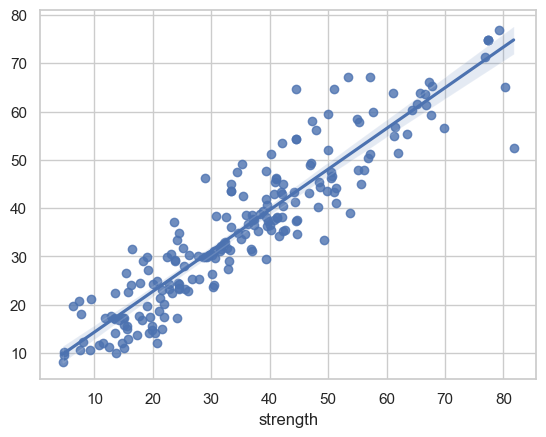

In [44]:
y_pred = RF_FI.predict(xFI_test)
    
MAE_RF_FI= mean_absolute_error(yFI_test, y_pred)
MSE_RF_FI= mean_squared_error(yFI_test, y_pred)
RMSE_RF_FI= mean_squared_error(yFI_test, y_pred)**0.5
R2_RF_FI= r2_score(yFI_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_RF_FI)
print("Mean Squared Error (MSE) :", MSE_RF_FI)
print("Root Mean Squared Error (RMSE) :", RMSE_RF_FI)
print("R-squared (R2) score :", R2_RF_FI)
         
sns.regplot(x=yFI_test,y=y_pred)

#### Observations
- Removing the features (ash, coarseagg and fineagg) does not affect the models.
- Also removing less important features decreases our model accuracy.

### <div style="color: gray;">Step 7.  Hyperparameter Tuning-</div>

- Conduct hyperparameter tuning for one or more selected models using techniques like Grid Search or Random Search.
- Explain the chosen hyperparameters and the reasoning behind them.


### <div style="color: gray;">Step 7.  Solution -</div>

- I use RandomizedSearchCV for hyperparameter optimization. It basically works with various parameters internally and finds out the best parameters.
- I apply Hyperparameter tuning technique in our Random Forest &  XGBoost Regressor Model because these two model gives present higher accuracy.

#### Initialized Hyperparameters

In [45]:
#I use RandomizedSearchCV for hyperparameter optimization

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 125, 151, 175, 201, 251, 300],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Define hyperparameters for XGBoost Regressor
XGB_params= {
    'n_estimators': [100, 125, 150, 200, 230, 260, 300],
    'max_depth': [None,3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.7, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0, 1.4, 1.6, 2],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0, 1.5],
    'min_child_weight': [1, 3, 5, 7, 9],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

#### Perform Randomized Forest Model for DRandomizedSearchCV Hyperparameter

In [46]:
#import hyperparameter
from sklearn.model_selection import RandomizedSearchCV

In [47]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 10],
                                        'n_estimators': [101, 125, 151, 175,
                                                         201, 251, 300]},
                   random_state=42)

In [48]:
rf_random_search.best_params_

{'n_estimators': 151,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 28}

#### Evalution Randomized Forest Model for DRandomizedSearchCV Hyperparameter

Mean Absolute Error (MAE) : 4.929536513396591
Mean Squared Error (MSE) : 42.21606414757323
Root Mean Squared Error (RMSE) : 6.497389025414226
R-squared (R2) score : 0.8604749666988463


<Axes: xlabel='strength'>

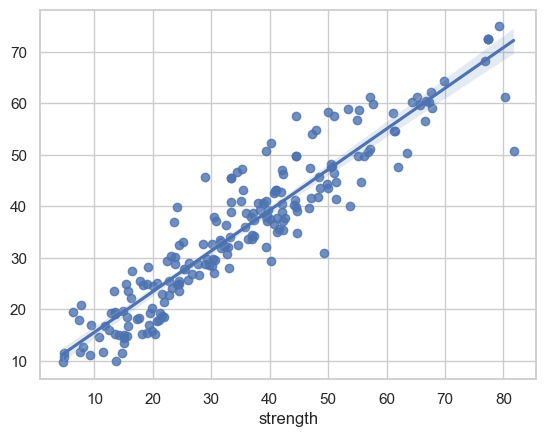

In [49]:
y_pred = rf_random_search.predict(x_test)

MAE_RF_RSH= mean_absolute_error(y_test, y_pred)
MSE_RF_RSH= mean_squared_error(y_test, y_pred)
RMSE_RF_RSH= mean_squared_error(y_test, y_pred)**0.5
R2_RF_RSH= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_RF_RSH)
print("Mean Squared Error (MSE) :", MSE_RF_RSH)
print("Root Mean Squared Error (RMSE) :", RMSE_RF_RSH)
print("R-squared (R2) score :", R2_RF_RSH)
         
sns.regplot(x=y_test,y=y_pred)

#### Perform XGBoost Regressor Model for DRandomizedSearchCV Hyperparameter

In [50]:
xgb_random_search = RandomizedSearchCV(estimator=XGBRegressor(use_label_encoder=False, eval_metric='logloss', random_state=42),
                                      param_distributions=XGB_params, cv=3,n_jobs=-1, verbose=2, random_state=42)
xgb_random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='logloss',
                                          feature_types=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_...
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0, 1.5],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.7, 1],
                                        'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [100, 125, 150, 200,
                                                         230, 260, 300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0,
                                                      1.4, 1.6, 2]},
                   random_state=42, verbose=2)

Mean Absolute Error (MAE) : 3.8307658222346634
Mean Squared Error (MSE) : 28.256977500306835
Root Mean Squared Error (RMSE) : 5.315729253856599
R-squared (R2) score : 0.9066100593144257


<Axes: xlabel='strength'>

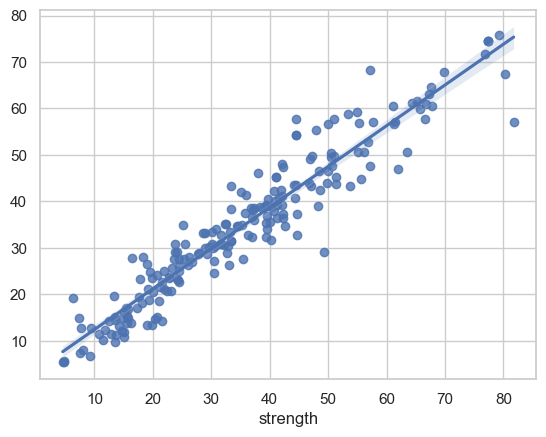

In [51]:
y_pred = xgb_random_search.predict(x_test)
    
MAE_XGB_RSH= mean_absolute_error(y_test, y_pred)
MSE_XGB_RSH= mean_squared_error(y_test, y_pred)
RMSE_XGB_RSH= mean_squared_error(y_test, y_pred)**0.5
R2_XGB_RSH= r2_score(y_test, y_pred)
    
print("Mean Absolute Error (MAE) :",MAE_XGB_RSH)
print("Mean Squared Error (MSE) :", MSE_XGB_RSH)
print("Root Mean Squared Error (RMSE) :", RMSE_XGB_RSH)
print("R-squared (R2) score :", R2_XGB_RSH)
         
sns.regplot(x=y_test,y=y_pred)

#### Observations
- Perform XGBoost Regressor Model for DRandomizedSearchCV Hyperparameter gives better accuracy

### <div style="color: gray;">Step 8.   Comparative Analysis-</div>
- Compare the performance of different models based on the evaluation metrics.
- Discuss the strengths and limitations of each model in the context of concrete strength prediction.



### <div style="color: gray;">Step 8.  Solution -</div>

#### Compare the performance of different models

In [52]:
d = {
    'model' : ['Linear Regression Model','Linear Regression with  degree 2', 'Linear Regression with  degree 3', 
               'Support Vector Machine(SVM) Model','XGBoost Regressor Model', 'Random Forest Regressor Model',
               'XGBoost Regressor with feature Importance','Random Forest with feature Importance',
               'Random Forest with DRandomizedSearchCV Hyperparameter','XGBoost Regressor with DRandomizedSearchCV Hyperparameter'],  

    'Mean Absolute Error(MAE)': [MAE_LR,MAE_LR_deg_2,MAE_LR_deg_3,MAE_SVR,MAE_XGB,MAE_RF,MAE_XGB_FI,MAE_RF_FI,MAE_RF_RSH,MAE_XGB_RSH],
    'Mean Squared Error(MSE)':[MSE_LR,MSE_LR_deg_2,MSE_LR_deg_3,MSE_SVR,MSE_XGB,MSE_RF,MSE_XGB_FI,MSE_RF_FI,MSE_RF_RSH,MSE_XGB_RSH],
    'Root Mean Squared Error(RMSE)':[RMSE_LR,RMSE_LR_deg_2,RMSE_LR_deg_3,RMSE_SVR,RMSE_XGB,RMSE_RF,RMSE_XGB_FI,RMSE_RF_FI,RMSE_RF_RSH,RMSE_XGB_RSH],  
    'R-squared (R2)score':[R2_LR,R2_LR_deg_2,R2_LR_deg_3,R2_SVR,R2_XGB,R2_RF,R2_XGB_FI,R2_RF_FI,R2_RF_RSH,R2_XGB_RSH],
    
}


d = pd.DataFrame(d)

d['Mean Absolute Error(MAE)'] = d['Mean Absolute Error(MAE)'].round(2)
d['Mean Squared Error(MSE)'] = d['Mean Squared Error(MSE)'].round(2)
d['Root Mean Squared Error(RMSE)'] = d['Root Mean Squared Error(RMSE)'].round(2)
d['R-squared (R2)score'] = d['R-squared (R2)score'].round(2)

d

,model,Mean Absolute Error(MAE),Mean Squared Error(MSE),Root Mean Squared Error(RMSE),R-squared (R2)score
0,Linear Regression Model,7.54,92.38,9.61,0.69
1,Linear Regression with degree 2,5.29,50.13,7.08,0.83
2,Linear Regression with degree 3,4.98,48.28,6.95,0.84
3,Support Vector Machine(SVM) Model,7.54,93.79,9.68,0.69
4,XGBoost Regressor Model,3.88,32.05,5.66,0.89
5,Random Forest Regressor Model,4.62,39.20,6.26,0.87
6,XGBoost Regressor with feature Importance,4.29,37.63,6.13,0.88
7,Random Forest with feature Importance,5.11,45.63,6.75,0.85
8,Random Forest with DRandomizedSearchCV Hyperpa...,4.93,42.22,6.50,0.86
9,XGBoost Regressor with DRandomizedSearchCV Hyp...,3.83,28.26,5.32,0.91


#### Visualize performance with histogram-

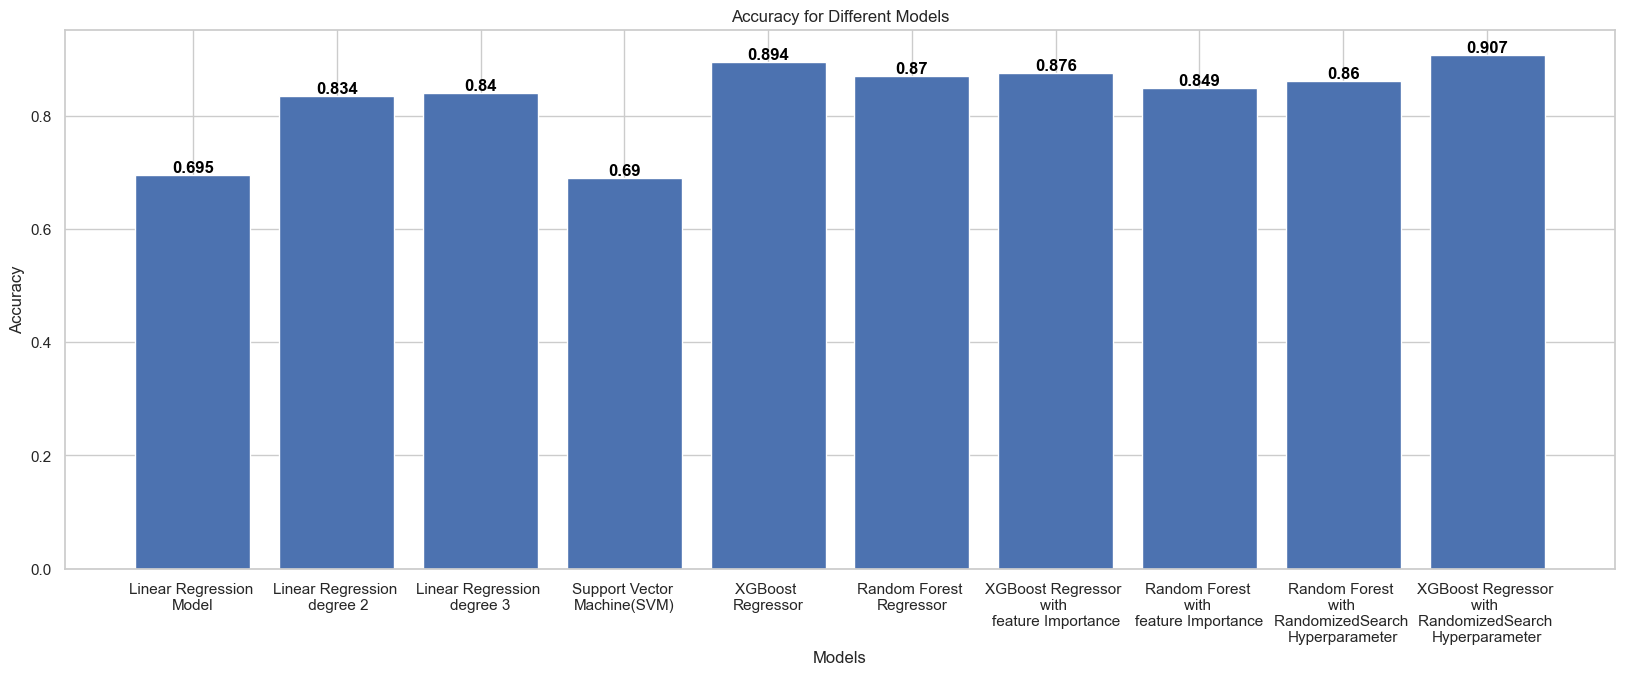

In [53]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(20, 7))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [R2_LR,R2_LR_deg_2,R2_LR_deg_3,R2_SVR,R2_XGB,R2_RF,R2_XGB_FI,R2_RF_FI,R2_RF_RSH,R2_XGB_RSH]
model_names = ['Linear Regression \nModel','Linear Regression \n degree 2', 'Linear Regression \ndegree 3', 
               'Support Vector \nMachine(SVM)','XGBoost \nRegressor', 'Random Forest \nRegressor',
               'XGBoost Regressor \nwith \nfeature Importance','Random Forest \nwith \nfeature Importance',
               'Random Forest \nwith \nRandomizedSearch \nHyperparameter','XGBoost Regressor \nwith \nRandomizedSearch \nHyperparameter']
plot_histogram(accuracy_values, model_names, 'Accuracy')

#### Identify the strengths and weaknesses of each model-

#### 1. Linear Regression (Accuracy=69%)
##### Strengths:

- `Simplicity:` Linear Regression is straightforward to understand and interpret.
- `Efficiency:` It's computationally efficient, making it suitable for large datasets.
- `Good Baseline:` Serves as a good baseline model for comparison with more complex models.

##### Weaknesses:

- `Limited to Linear Relationships:` It can only model linear relationships, which may not capture the complexity of the data.
- `Overfitting:` If the model is too simple, it might underfit the data.
- `Performance:` The accuracy of 69% indicates that it might not be capturing the data's complexity well.

#### 2. Polynomial Regression (Degree 2 and 3) (Accuracy= 83% & 84%)
##### Strengths:

- `Captures Non-linear Relationships:` By including polynomial terms, it can model non-linear relationships.
- `Improved Performance:` Shows a significant improvement in accuracy (83% and 84% for degree 2 and 3, respectively) over simple linear regression.

##### Weaknesses:

- `Overfitting Risk:` Higher-degree polynomials can lead to overfitting, especially with limited data.
- `Interpretability:` More complex than simple linear regression, making it harder to interpret.


#### 3. Support Vector Machine (SVM) (Accuracy= 69%)
##### Strengths:

- `Effective in High-Dimensional Spaces:` SVM can perform well with a large number of features.
- `Versatility:` Can be customized with different kernel functions to capture non-linear relationships.

##### Weaknesses:

- `Computationally Expensive:` Training can be time-consuming, especially with large datasets.
- `Tuning Complexity:` SVMs require careful parameter tuning (e.g., choice of kernel, regularization parameter).


#### 4. XGBoost Regressor ( Accuracy= 89%)
##### Strengths:

- `High Performance:` Achieved the highest accuracy (89%), indicating strong predictive power.
- `Feature Importance:` Can provide insights into the importance of different features.
- `Handles Missing Data:` Robust to missing data and various data distributions.
- `Regularization:` Built-in regularization helps prevent overfitting.

##### Weaknesses:

- `Complexity:` Can be complex to implement and interpret.
- `Tuning:` Requires careful parameter tuning to achieve optimal performance.


#### 5. Random Forest Regressor (Accuracy= 87%)
##### Strengths:

- `Versatility:` Can capture both linear and non-linear relationships.
- `Robustness:` Generally robust to overfitting due to averaging multiple trees.
- `Feature Importance:` Can easily determine the importance of each feature.

##### Weaknesses:

- `Computationally Intensive:` Training can be slower compared to simpler models.
- `Interpretability:` The ensemble nature can make interpretation difficult.


#### 6. XGBoost Regressor with Feature Importance (Accuracy= 88%)
##### Strengths:

- `Improved Interpretability:` Focusing on the most important features can simplify the model.
- `Performance:` Accuracy is still high at 88%, close to the best-performing models.

##### Weaknesses:

- `Potential Loss of Information:` Removing features may lead to a slight drop in accuracy.


#### 7. Random Forest with Feature Importance (Accuracy= 85%)
##### Strengths:

- `Reduced Complexity:` Focusing on important features can reduce the model's complexity.
- `Good Performance:` Maintains a high accuracy of 85%.

##### Weaknesses:

- `Similar to XGBoost:` May also suffer from a slight loss of accuracy due to feature reduction.


#### 8. Random Forest with DRandomizedSearchCV Hyperparameter Tuning ( Accuracy= 86%)
##### Strengths:

- `Robustness to Overfitting:` Random Forests tend to be less prone to overfitting compared to decision trees because they average multiple trees, which helps smooth out the predictions.
- `Interpretability:` Feature importance scores can be easily extracted, making it relatively straightforward to understand which features are most influential.
- `Versatility:` Can handle both classification and regression tasks and is effective on a wide range of datasets.
- `Parallelization:` The algorithm can be parallelized, making it computationally efficient, especially with large datasets.

##### Weaknesses:

- `Complexity:` The resulting model can be quite complex, making it harder to interpret than simpler models.
- `Memory Consumption:` Random Forest models can require significant memory and computational resources, especially when dealing with a large number of trees or features.
- `Sensitivity to Hyperparameters:` Performance can be sensitive to the choice of hyperparameters, such as the number of trees or maximum depth.


#### 9. XGBoost Regressor with DRandomizedSearchCV Hyperparameter Tuning ( Accuracy= 91%)
##### Strengths:

- `High Accuracy:` XGBoost often provides higher accuracy compared to Random Forests due to its advanced boosting techniques, as evidenced by the higher accuracy (91%) you achieved.
- `Regularization:` XGBoost includes built-in regularization parameters to prevent overfitting, making it robust and generalizable.
- `Handling Missing Data:` XGBoost can handle missing data naturally, which can be advantageous in real-world datasets.
- `Speed and Efficiency:` XGBoost is optimized for speed and performance, often being faster than other implementations of gradient boosting.

##### Weaknesses:

- `Complexity:` XGBoost models can be complex and less interpretable compared to simpler models. Understanding the impact of each feature and the model's decision-making process can be challenging.
- `Hyperparameter Tuning:` The model has a large number of hyperparameters, which can be difficult and time-consuming to tune for optimal performance.
- `Resource Intensive:` XGBoost can be resource-intensive, especially when dealing with large datasets and a high number of trees.



### <div style="color: gray;">Step 9. Conclusion-</div>
- Summarize the findings of the project.
- Discuss any challenges faced during the regression modeling process.


### <div style="color: gray;">Step 9.  Solution -</div>

#### Conclusion

- `Best Performing Models:` XGBoost Regressor with RandomizedSearchCV Hyperparameter tuning (91% accuracy) and Random Forest Regressor (87% accuracy).

- `Trade-offs:` While simpler models like Linear Regression and SVM are easier to interpret and faster to train, they may not capture the data's complexity as effectively as ensemble methods like Random Forest and XGBoost. Advanced models may require more computational resources and careful tuning but often result in better predictive performance.


In the above study, I find that in order to predict the strength of concrete-

- The features that affect the strength are cement, slag, water, superplastic and age.
- The best model is Gradient boosting.
- Using the Gradient boosting model, I can predict the strength accurately between 87% to 91% data. 